In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import time
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.decomposition import PCA
from fanalysis.pca import PCA
import scipy.stats as stats
import math
%matplotlib inline

In [14]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [117]:
D = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\kmean_Data.csv')\
.set_index("customer_unique_id")

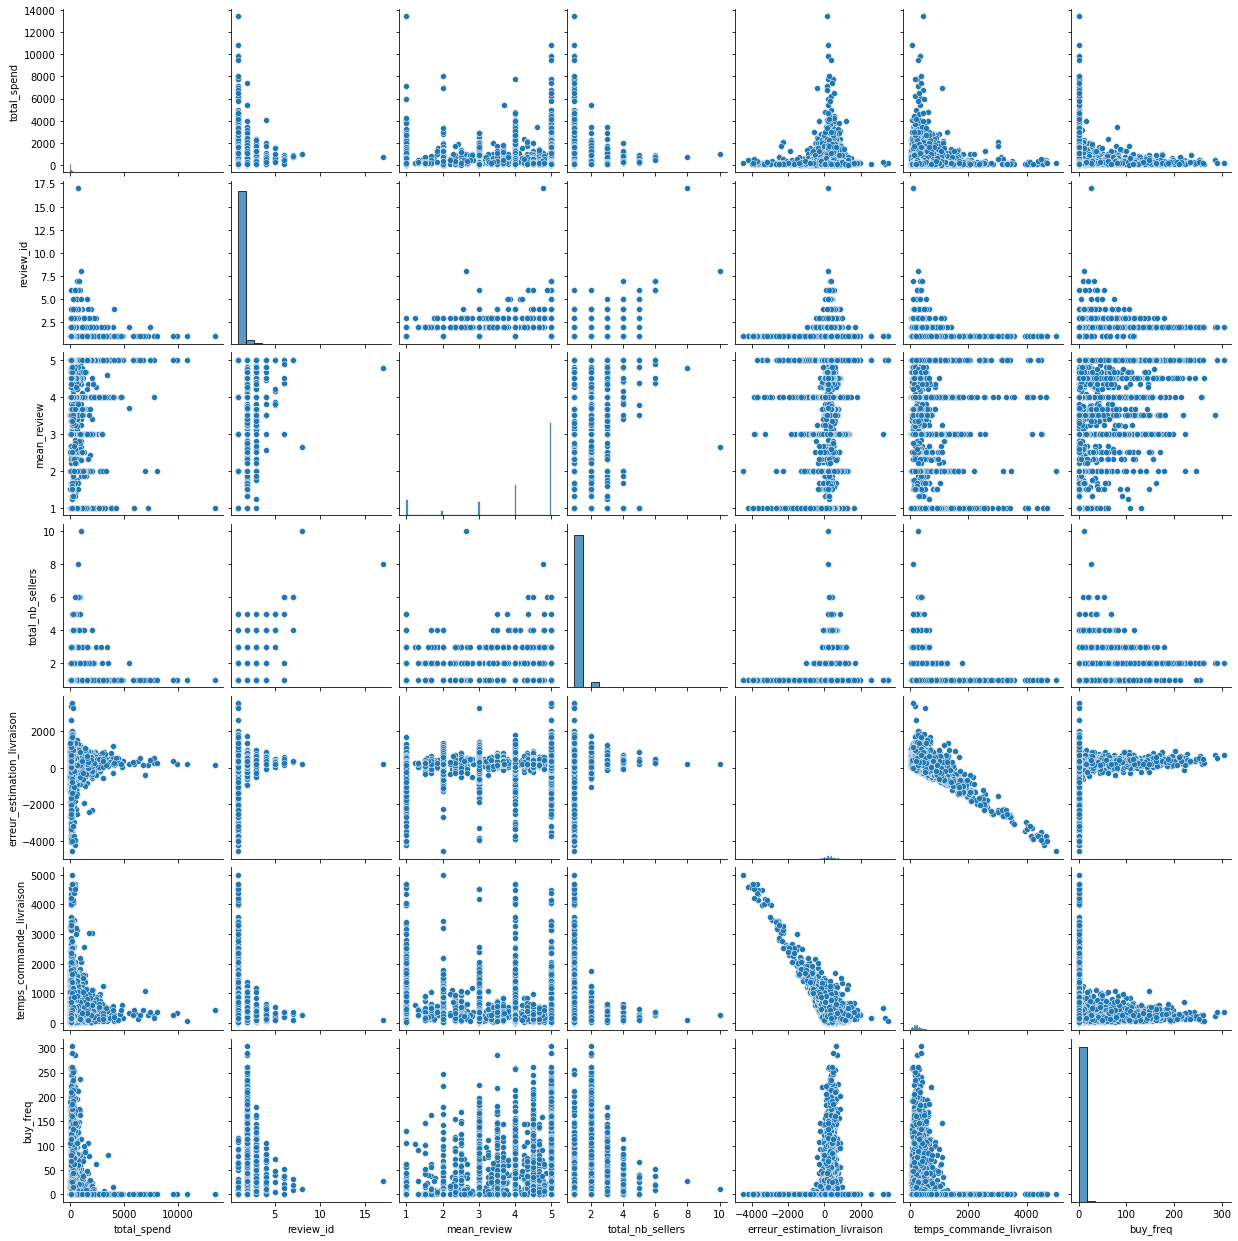

In [52]:
sns.pairplot(D)

In [135]:
#nombre de variables
p = D.shape[1]
#nombre d'observations
n = D.shape[0]
#matrice des X
X = D.values

#instancier l'objet de calcul
#std_unit = True ➔ ACP normée
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)
#lancer les calculs sur les données
acp.fit(X)

PCA(col_labels=Index(['total_spend', 'review_id', 'mean_review', 'total_nb_sellers',
       'erreur_estimation_livraison', 'temps_commande_livraison', 'buy_freq'],
      dtype='object'),
    row_labels=Index(['0000366f3b9a7992bf8c76cfdf3221e2', '0000b849f77a49e4a4ce2b2a4ca5be3f',
       '0000f46a3911fa3c0805444483337064', '0000f6ccb0745a6a4b88665a16c9f078',
       '0004aac84e0df4da2b147fca7...
       'fff7219c86179ca6441b8f37823ba3d3', 'fff96bc586f78b1f070da28c4977e810',
       'fffa431dd3fcdefea4b1777d114144f2', 'fffb09418989a0dbff854a28163e47c6',
       'fffbf87b7a1a6fa8b03f081c5f51a201', 'fffcf5a5ff07b0908bd4e2dbc735a684',
       'fffea47cd6d3cc0a88bd621562a9d061', 'ffff371b4d645b6ecea244b27531430a',
       'ffff5962728ec6157033ef9805bacc48', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=92753))

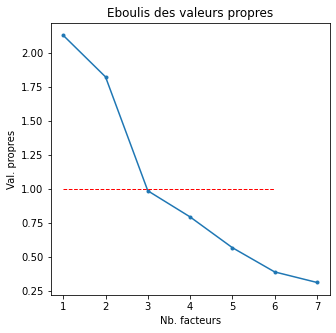

In [122]:
#préparer le graphique
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#rajout du seuil du Kaiser
ax.plot([1,6],[1,1],"r--",linewidth=1)
plt.show()

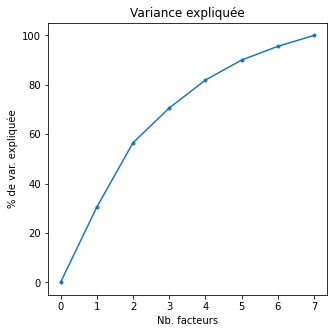

In [124]:
#proportion de variance expliquée
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("% de var. expliquée")
plt.title("Variance expliquée")
plt.show()

In [153]:
#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
#stat. de test Bartlett
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))

#degrés de liberté
ddl = p*(p-1)/2
#p-value
#print(1-stats.chi2.cdf(C,df=ddl))

#seuils pour test des bâtons brisés
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))


print("Karlis-Saporta-Spinaki : " + str( kss) +"\n"
      +   "Bartlett : " + str( C) +"\n"
      + "degrés de liberté : " + str(ddl) + "\n" 
      +  "p-value : " + str(1-stats.chi2.cdf(C,df=ddl)) + "\n"
      + "seuils pour le test des bâtons brisés" + str(b))


Karlis-Saporta-Spinaki : 1.0160858486939373
Bartlett : 145712.91325415595
degrés de liberté : 21.0
p-value : 0.0
seuils pour le test des bâtons brisés[2.59 1.59 1.09 0.76 0.51 0.31 0.14]


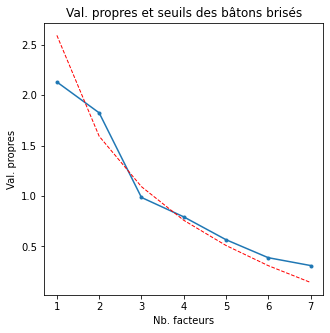

In [130]:
#vérification des v.p. qui passent
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Val. propres et seuils des bâtons brisés")
#rajout du seuil des bâtons brisés
ax.plot(range(1,p+1),b,"r--",linewidth=1)

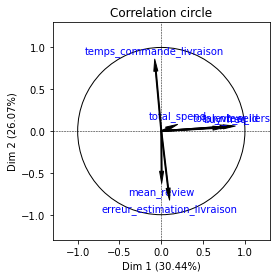

In [131]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [133]:
#contributions des variables sur les 2 premiers facteurs (en %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=D.columns))

                                     0          1
total_spend                   1.769924   0.349195
review_id                    36.672372   0.197301
mean_review                   0.001046  21.331894
total_nb_sellers             33.662564   0.193064
erreur_estimation_livraison   0.458746  37.340946
temps_commande_livraison      0.289806  40.482625
buy_freq                     27.145542   0.104976


In [ ]:
## trop de données a afficher.


##graphique avec les échelles carrées
#fig, ax = plt.subplots(figsize=(10,10))
#ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
#ax.axis([-5,+5,-5,+5])
#ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
#ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
#ax.set_xlabel("Dim.1 (30.44%)")
#ax.set_ylabel("Dim.2 (26.27%)")
#plt.title("Carte des individus")
#for i in range(n):
# ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],".")
#
#plt.show()
#

In [75]:
D = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\css4.csv')\
.set_index("customer_unique_id")
D.drop(columns=['nb_order', 'total_nb_sellers'
                ,'temps_livraison_review'
                ,'temps_approbation'
                ,'transport_cost_per_km'
               , 'ratio_transport_cost'
               ]
       , inplace = True)

In [76]:
D = clean_dataset(D)
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92301 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nb_review                    92301 non-null  float64
 1   mean_review                  92301 non-null  float64
 2   total_nb_product             92301 non-null  float64
 3   erreur_estimation_livraison  92301 non-null  float64
 4   temps_commande_livraison     92301 non-null  float64
 5   buy_freq                     92301 non-null  float64
 6   delivery_distance            92301 non-null  float64
 7   Art                          92301 non-null  float64
 8   Books                        92301 non-null  float64
 9   Fashion                      92301 non-null  float64
 10  Food_and_Drinks              92301 non-null  float64
 11  Health_and_beauty            92301 non-null  float64
 12  High_tech            

In [5]:
sns.pairplot(D)

Error in callback <function flush_figures at 0x0000021897EB5B80> (for post_execute):



KeyboardInterrupt



In [77]:
#nombre de variables
p = D.shape[1]
#nombre d'observations
n = D.shape[0]
#matrice des X
X = D.values

In [78]:
#instancier l'objet de calcul
#std_unit = True ➔ ACP normée
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)
#lancer les calculs sur les données
acp.fit(X)

PCA(col_labels=Index(['nb_review', 'mean_review', 'total_nb_product',
       'erreur_estimation_livraison', 'temps_commande_livraison', 'buy_freq',
       'delivery_distance', 'Art', 'Books', 'Fashion', 'Food_and_Drinks',
       'Health_and_beauty', 'High_tech', 'Home_supply', 'Other',
       'Sport_supply', 'Tools', 'boleto', 'credit_card', 'debit_card',
       'not_defined', 'voucher', 'avg_bask_price'...
       'fff7219c86179ca6441b8f37823ba3d3', 'fff96bc586f78b1f070da28c4977e810',
       'fffa431dd3fcdefea4b1777d114144f2', 'fffb09418989a0dbff854a28163e47c6',
       'fffbf87b7a1a6fa8b03f081c5f51a201', 'fffcf5a5ff07b0908bd4e2dbc735a684',
       'fffea47cd6d3cc0a88bd621562a9d061', 'ffff371b4d645b6ecea244b27531430a',
       'ffff5962728ec6157033ef9805bacc48', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=92301))

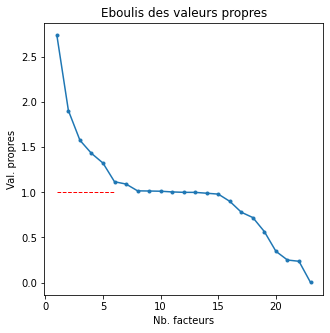

In [79]:
#préparer le graphique
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#rajout du seuil du Kaiser
ax.plot([1,6],[1,1],"r--",linewidth=1)
plt.show()

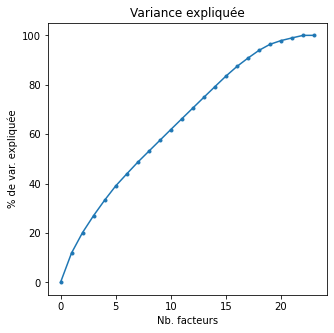

In [80]:
#proportion de variance expliquée
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("% de var. expliquée")
plt.title("Variance expliquée")
plt.show()

In [81]:
#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
#stat. de test Bartlett
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))

#degrés de liberté
ddl = p*(p-1)/2
#p-value
#print(1-stats.chi2.cdf(C,df=ddl))

#seuils pour test des bâtons brisés
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))


print("Karlis-Saporta-Spinaki : " + str( kss) +"\n"
      +   "Bartlett : " + str( C) +"\n"
      + "degrés de liberté : " + str(ddl) + "\n" 
      +  "p-value : " + str(1-stats.chi2.cdf(C,df=ddl)) + "\n"
      + "seuils pour le test des bâtons brisés" + str(b))


Karlis-Saporta-Spinaki : 1.0308773830561901
Bartlett : 849386.148794775
degrés de liberté : 253.0
p-value : 0.0
seuils pour le test des bâtons brisés[3.73429151 2.73429151 2.23429151 1.90095818 1.65095818 1.45095818
 1.28429151 1.14143437 1.01643437 0.90532326 0.80532326 0.71441417
 0.63108083 0.55415776 0.48272918 0.41606252 0.35356252 0.29473899
 0.23918343 0.18655185 0.13655185 0.08893281 0.04347826]


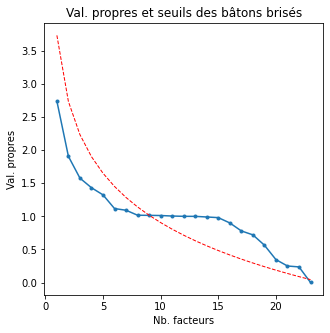

In [82]:
#vérification des v.p. qui passent
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Val. propres et seuils des bâtons brisés")
#rajout du seuil des bâtons brisés
ax.plot(range(1,p+1),b,"r--",linewidth=1)

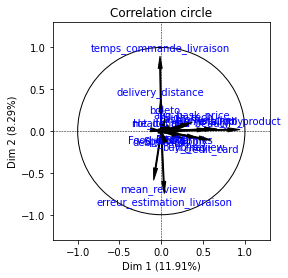

In [83]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [84]:
#contributions des variables sur les 2 premiers facteurs (en %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=D.columns))

                                     0          1
nb_review                     7.444935   0.400197
mean_review                   0.301219  17.963022
total_nb_product             32.178127   0.017572
erreur_estimation_livraison   0.046123  29.121289
temps_commande_livraison      0.008703  41.886563
buy_freq                      2.643746   0.428835
delivery_distance             0.001512   7.399521
Art                           0.006801   0.000168
Books                         0.501967   0.000334
Fashion                       1.488838   0.085735
Food_and_Drinks               0.404001   0.000046
Health_and_beauty             2.070857   0.001249
High_tech                     3.741239   0.271672
Home_supply                  11.914396   0.020045
Other                         1.497490   0.007051
Sport_supply                  1.133780   0.004534
Tools                         0.729669   0.003777
boleto                        0.070730   1.184564
credit_card                  12.868751   0.602513


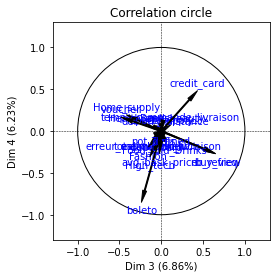

In [85]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=3,num_y_axis=4)

## subset_small_try :

In [88]:
D = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\css4.csv')\
.set_index("customer_unique_id")

In [89]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nb_order                     96096 non-null  int64  
 1   nb_review                    96096 non-null  int64  
 2   mean_review                  95380 non-null  float64
 3   total_nb_product             96096 non-null  int64  
 4   total_nb_sellers             96096 non-null  int64  
 5   temps_approbation            95997 non-null  float64
 6   erreur_estimation_livraison  93356 non-null  float64
 7   temps_commande_livraison     93356 non-null  float64
 8   temps_livraison_review       92753 non-null  float64
 9   buy_freq                     96096 non-null  float64
 10  delivery_distance            94954 non-null  float64
 11  ratio_transport_cost         96096 non-null  float64
 12  transport_cost_per_km

In [91]:
D= D[['mean_review','temps_commande_livraison','avg_bask_price','nb_order','delivery_distance','buy_freq']]
D = clean_dataset(D)

In [92]:
#nombre de variables
p = D.shape[1]
#nombre d'observations
n = D.shape[0]
#matrice des X
X = D.values

In [93]:
#instancier l'objet de calcul
#std_unit = True ➔ ACP normée
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)
#lancer les calculs sur les données
acp.fit(X)

PCA(col_labels=Index(['mean_review', 'temps_commande_livraison', 'avg_bask_price', 'nb_order',
       'delivery_distance', 'buy_freq'],
      dtype='object'),
    row_labels=Index(['0000366f3b9a7992bf8c76cfdf3221e2', '0000b849f77a49e4a4ce2b2a4ca5be3f',
       '0000f46a3911fa3c0805444483337064', '0000f6ccb0745a6a4b88665a16c9f078',
       '0004aac84e0df4da2b147fca70cf8255', '0004bd2a26a76fe21...
       'fff7219c86179ca6441b8f37823ba3d3', 'fff96bc586f78b1f070da28c4977e810',
       'fffa431dd3fcdefea4b1777d114144f2', 'fffb09418989a0dbff854a28163e47c6',
       'fffbf87b7a1a6fa8b03f081c5f51a201', 'fffcf5a5ff07b0908bd4e2dbc735a684',
       'fffea47cd6d3cc0a88bd621562a9d061', 'ffff371b4d645b6ecea244b27531430a',
       'ffff5962728ec6157033ef9805bacc48', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=92301))

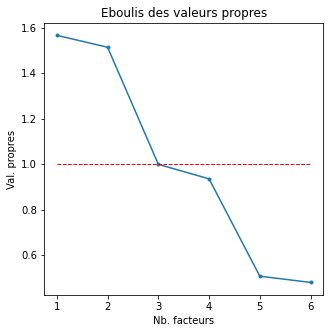

In [94]:
#préparer le graphique
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#rajout du seuil du Kaiser
ax.plot([1,6],[1,1],"r--",linewidth=1)
plt.show()

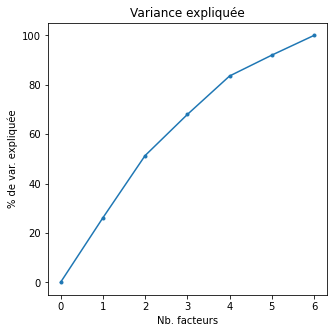

In [95]:
#proportion de variance expliquée
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("% de var. expliquée")
plt.title("Variance expliquée")
plt.show()

In [96]:
#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
#stat. de test Bartlett
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))

#degrés de liberté
ddl = p*(p-1)/2
#p-value
#print(1-stats.chi2.cdf(C,df=ddl))

#seuils pour test des bâtons brisés
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))


print("Karlis-Saporta-Spinaki : " + str( kss) +"\n"
      +   "Bartlett : " + str( C) +"\n"
      + "degrés de liberté : " + str(ddl) + "\n" 
      +  "p-value : " + str(1-stats.chi2.cdf(C,df=ddl)) + "\n"
      + "seuils pour le test des bâtons brisés" + str(b))


Karlis-Saporta-Spinaki : 1.0147202147989416
Bartlett : 57147.73542023093
degrés de liberté : 15.0
p-value : 0.0
seuils pour le test des bâtons brisés[2.45       1.45       0.95       0.61666667 0.36666667 0.16666667]


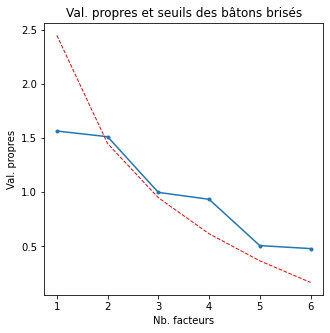

In [97]:
#vérification des v.p. qui passent
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Val. propres et seuils des bâtons brisés")
#rajout du seuil des bâtons brisés
ax.plot(range(1,p+1),b,"r--",linewidth=1)

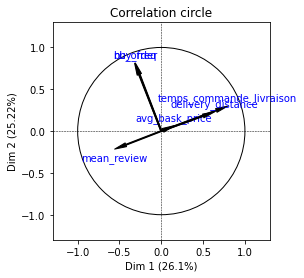

In [98]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [99]:
#contributions des variables sur les 2 premiers facteurs (en %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=D.columns))

                                  0          1
mean_review               19.856004   3.069537
temps_commande_livraison  40.098537   5.852204
avg_bask_price             1.509475   0.278432
nb_order                   6.163996  43.852145
delivery_distance         25.860111   3.483023
buy_freq                   6.511878  43.464660


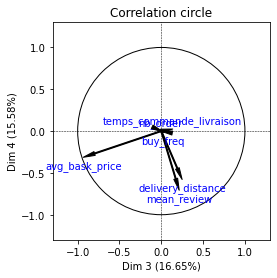

In [100]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=3,num_y_axis=4)

# catherogy 

In [120]:
D = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\css4.csv')\
.set_index("customer_unique_id")

In [106]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nb_order                     96096 non-null  int64  
 1   nb_review                    96096 non-null  int64  
 2   mean_review                  95380 non-null  float64
 3   total_nb_product             96096 non-null  int64  
 4   total_nb_sellers             96096 non-null  int64  
 5   temps_approbation            95997 non-null  float64
 6   erreur_estimation_livraison  93356 non-null  float64
 7   temps_commande_livraison     93356 non-null  float64
 8   temps_livraison_review       92753 non-null  float64
 9   buy_freq                     96096 non-null  float64
 10  delivery_distance            94954 non-null  float64
 11  ratio_transport_cost         96096 non-null  float64
 12  transport_cost_per_km

In [121]:
D= D[['Books','Fashion',
      'avg_bask_price',
      'Food_and_Drinks',
      'Health_and_beauty',
      'High_tech',
      'Home_supply',
      'Other',
      'Sport_supply',
      'Tools',
      'boleto',
      'credit_card',
      'debit_card',
      'not_defined',
      'voucher']]
D = clean_dataset(D)

<AxesSubplot:>

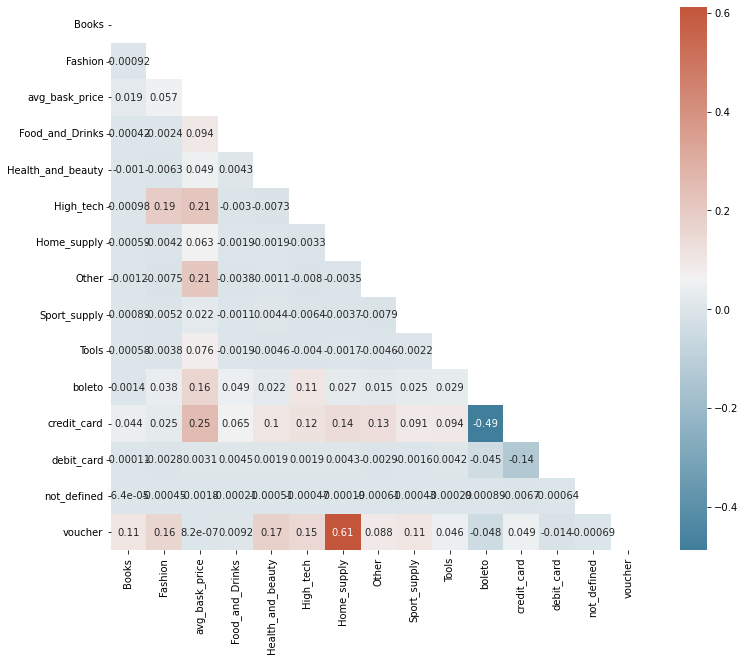

In [122]:
corr = D.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [123]:
#nombre de variables
p = D.shape[1]
#nombre d'observations
n = D.shape[0]
#matrice des X
X = D.values

In [124]:
#instancier l'objet de calcul
#std_unit = True ➔ ACP normée
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)
#lancer les calculs sur les données
acp.fit(X)

PCA(col_labels=Index(['Books', 'Fashion', 'avg_bask_price', 'Food_and_Drinks',
       'Health_and_beauty', 'High_tech', 'Home_supply', 'Other',
       'Sport_supply', 'Tools', 'boleto', 'credit_card', 'debit_card',
       'not_defined', 'voucher'],
      dtype='object'),
    row_labels=Index(['0000366f3b9a7992bf8c76cfdf3221e2', '0000b849f77a49e4a4ce2b2a4ca5be3f',
       '0000f46a3911fa3c0805444483337064...
       'fff96bc586f78b1f070da28c4977e810', 'fffa431dd3fcdefea4b1777d114144f2',
       'fffb09418989a0dbff854a28163e47c6', 'fffbf87b7a1a6fa8b03f081c5f51a201',
       'fffcc512b7dfecaffd80f13614af1d16', 'fffcf5a5ff07b0908bd4e2dbc735a684',
       'fffea47cd6d3cc0a88bd621562a9d061', 'ffff371b4d645b6ecea244b27531430a',
       'ffff5962728ec6157033ef9805bacc48', 'ffffd2657e2aad2907e67c3e9daecbeb'],
      dtype='object', name='customer_unique_id', length=96096))

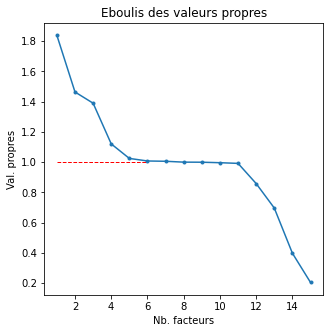

In [125]:
#préparer le graphique
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#rajout du seuil du Kaiser
ax.plot([1,6],[1,1],"r--",linewidth=1)
plt.show()

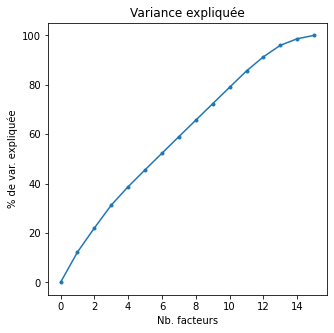

In [126]:
#proportion de variance expliquée
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("% de var. expliquée")
plt.title("Variance expliquée")
plt.show()

In [127]:
#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
#stat. de test Bartlett
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))

#degrés de liberté
ddl = p*(p-1)/2
#p-value
#print(1-stats.chi2.cdf(C,df=ddl))

#seuils pour test des bâtons brisés
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))


print("Karlis-Saporta-Spinaki : " + str( kss) +"\n"
      +   "Bartlett : " + str( C) +"\n"
      + "degrés de liberté : " + str(ddl) + "\n" 
      +  "p-value : " + str(1-stats.chi2.cdf(C,df=ddl)) + "\n"
      + "seuils pour le test des bâtons brisés" + str(b))


Karlis-Saporta-Spinaki : 1.0241403530849904
Bartlett : 149384.41713619098
degrés de liberté : 105.0
p-value : 0.0
seuils pour le test des bâtons brisés[3.31822899 2.31822899 1.81822899 1.48489566 1.23489566 1.03489566
 0.86822899 0.72537185 0.60037185 0.48926074 0.38926074 0.29835165
 0.21501832 0.13809524 0.06666667]


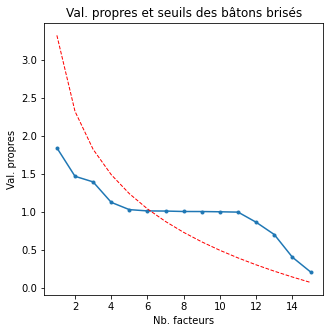

In [128]:
#vérification des v.p. qui passent
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Val. propres et seuils des bâtons brisés")
#rajout du seuil des bâtons brisés
ax.plot(range(1,p+1),b,"r--",linewidth=1)

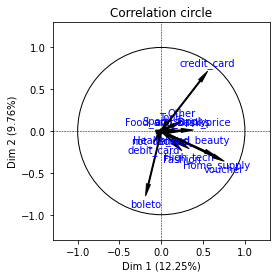

In [129]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [130]:
#contributions des variables sur les 2 premiers facteurs (en %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=D.columns))

                           0          1
Books               0.937140   0.017006
Fashion             3.263727   3.707344
avg_bask_price      7.907292   0.010907
Food_and_Drinks     0.335189   0.015815
Health_and_beauty   3.037583   0.000611
High_tech           5.977100   3.002234
Home_supply        23.513842   6.242763
Other               3.282814   0.942840
Sport_supply        1.286824   0.029668
Tools               0.830932   0.284847
boleto              1.918069  40.969464
credit_card        16.642424  34.888523
debit_card          0.406230   1.071507
not_defined         0.002615   0.007987
voucher            30.658220   8.808484


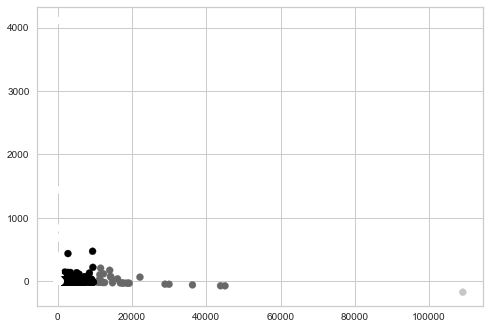

In [142]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform ACP
pca = PCA(n_components=2)
pca_components = pca.fit_transform(D)

# Choose number of clusters
n_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(pca_components)

# Plot the clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels)
plt.show()
